In [77]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [78]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [79]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [81]:
df.duplicated().sum()

0

In [82]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [83]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [84]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [86]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

KeyError: "['RowNumber' 'CustomerId' 'Surname'] not found in axis"

In [87]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Means Simply Geography and Gender will be in numerical form

In [88]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [89]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [90]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [91]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [92]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [93]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [94]:
X_train.shape

(8000, 11)

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [96]:
X_train_trf

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [97]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [98]:
model = Sequential()

model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid') )

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_3 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 12        
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


Acuracy will also be print after every epochs so added metrics accuracy

In [100]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

Verbose : Details printing while training, 0 : nothing, 1 : little 2 : little more 3+ : evrything

In [101]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 1s 3ms/step - loss: 392.4441 - accuracy: 0.6906 - val_loss: 79.0508 - val_accuracy: 0.7469
Epoch 2/100
128/128 [==============================] - 0s 2ms/step - loss: 59.4729 - accuracy: 0.7016 - val_loss: 39.5312 - val_accuracy: 0.7844
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 41.5261 - accuracy: 0.7016 - val_loss: 33.3216 - val_accuracy: 0.5263
Epoch 4/100
128/128 [==============================] - 0s 2ms/step - loss: 45.1296 - accuracy: 0.6900 - val_loss: 49.6196 - val_accuracy: 0.7956
Epoch 5/100
128/128 [==============================] - 0s 2ms/step - loss: 33.6661 - accuracy: 0.6981 - val_loss: 26.6627 - val_accuracy: 0.7781
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 37.3792 - accuracy: 0.6944 - val_loss: 32.9076 - val_accuracy: 0.7937
Epoch 7/100
128/128 [==============================] - 0s 2ms/step - loss: 36.7967 - accuracy: 0.6898 - val_loss: 39.1188 - val_a

In [102]:
model.layers[2].get_weights()

[array([[-0.06137288],
        [-0.63877803],
        [-0.76084936],
        [ 0.15282525],
        [ 0.16593808],
        [ 0.5230307 ],
        [-0.0329162 ],
        [ 0.4042584 ],
        [ 0.25577906],
        [-0.5032581 ],
        [ 0.04528832]], dtype=float32),
 array([-0.02828955], dtype=float32)]

In [106]:
y_pred = model.predict(X_test)

In [104]:
y_pred

array([[1.       ],
       [1.       ],
       [0.7327891],
       ...,
       [1.       ],
       [1.       ],
       [0.9999944]], dtype=float32)

Deciding Thresold! Since there is no fix thresold so this time assume this is what it is

In [105]:
np.where(y_pred>0.5,1,0)

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

Har row me jis class ki probability sabse zyada hai, uska index (class number) return karta hai.

In [108]:
y_pred = y_pred.argmax(axis=-1)

In [110]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

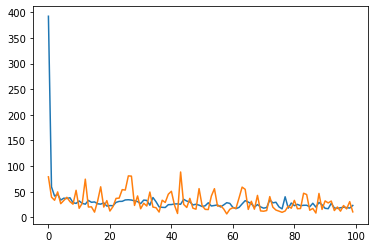

In [111]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

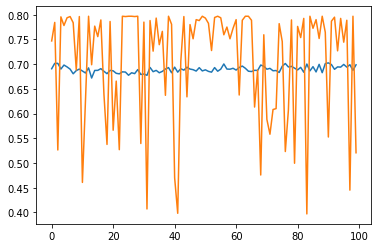

In [112]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])